In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set figure size, line width, and tick label size
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#mengecek spasi kosong
df.eq('').sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Pengamatan:

- Data terdiri dari 1470 baris <br>
- Tidak ada data yang NULL/Missing Value <br>
- Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)<br>

In [8]:
#Mendefinisikan kolom yang di analisis
nums = df.select_dtypes('int')
cats = df.select_dtypes('object')

print('Numerical :')
print(list(nums))

print('\nCategorical :')
print(list(cats))

Numerical :
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical :
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


## Descriptive

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
df.describe().loc[['mean', '50%']].T

,mean,50%
Age,36.923810,36.0
DailyRate,802.485714,802.0
DistanceFromHome,9.192517,7.0
Education,2.912925,3.0
EmployeeCount,1.000000,1.0
EmployeeNumber,1024.865306,1020.5
EnvironmentSatisfaction,2.721769,3.0
HourlyRate,65.891156,66.0
JobInvolvement,2.729932,3.0
JobLevel,2.063946,2.0


In [11]:
cats.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [12]:
df.columns[df.nunique() == 1]

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

Observasi :

Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome` <br>
Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` , `EmployeeCount` dan `Over18`

In [13]:
#melihat unique value di setiap kolom bertipe object
for col in cats:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: Attrition
Unique values: ['Yes', 'No']

Column: BusinessTravel
Unique values: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

Column: Department
Unique values: ['Sales', 'Research & Development', 'Human Resources']

Column: EducationField
Unique values: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']

Column: Gender
Unique values: ['Female', 'Male']

Column: JobRole
Unique values: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']

Column: MaritalStatus
Unique values: ['Single', 'Married', 'Divorced']

Column: Over18
Unique values: ['Y']

Column: OverTime
Unique values: ['Yes', 'No']



# VIsualization

### Univariat

In [14]:
len(nums.columns)

26

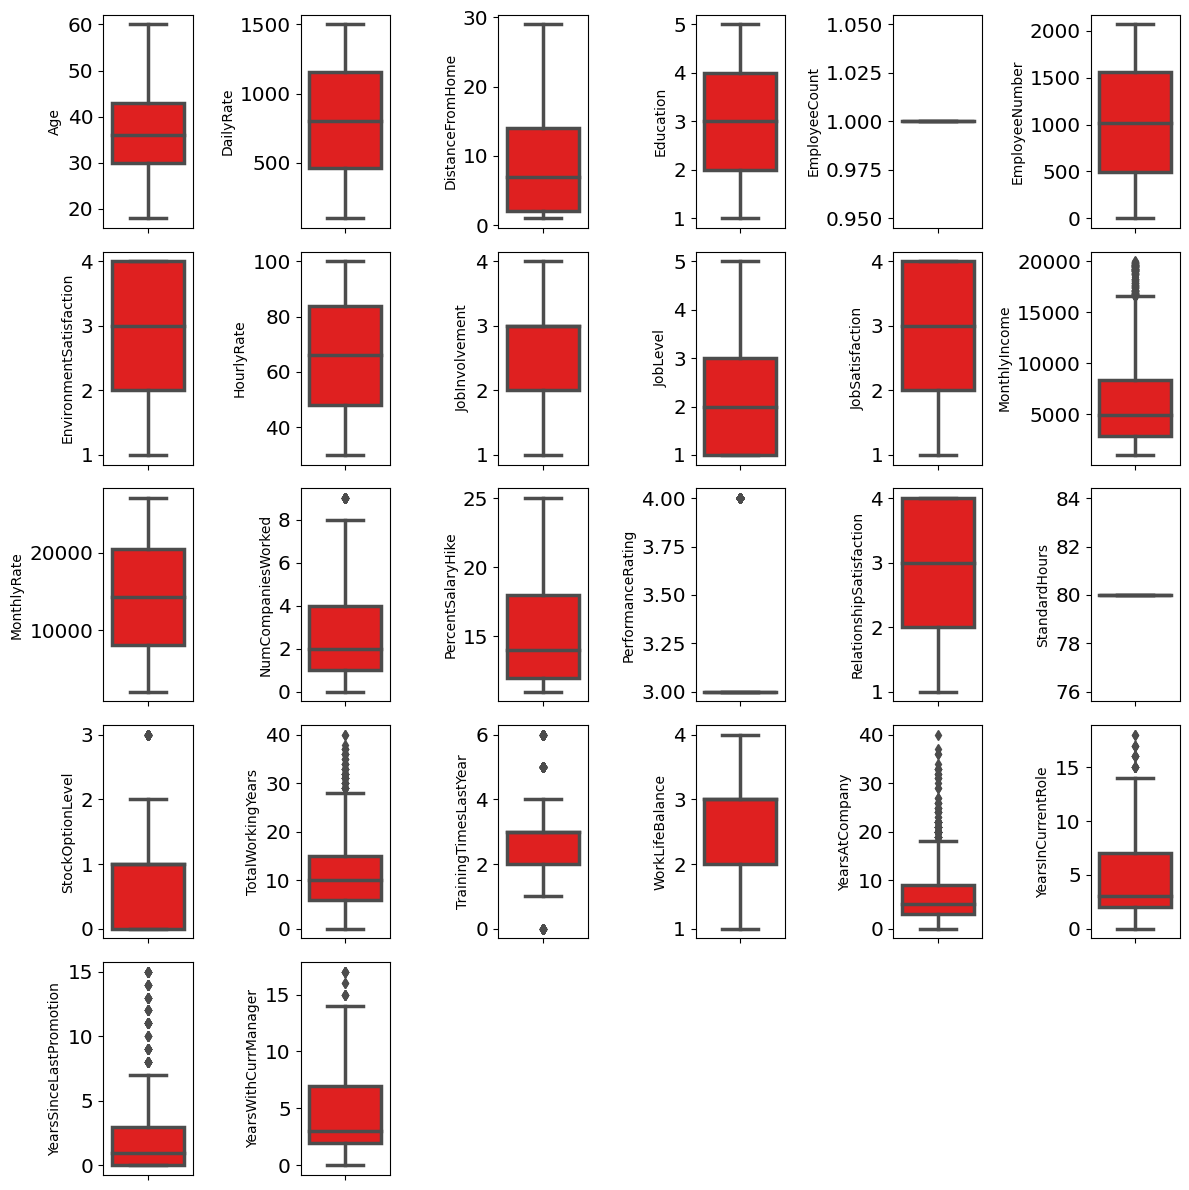

In [15]:
#incividual Boxplot(numeric)
import math
features = nums.columns
plt.figure(figsize=(12, 12))
for i in range(0, len(features)):
    plt.subplot(math.ceil(len(features) / 6), 6, i + 1)
    sns.boxplot(y=df[features[i]], color='r', orient='v')
    plt.tight_layout()

plt.show()

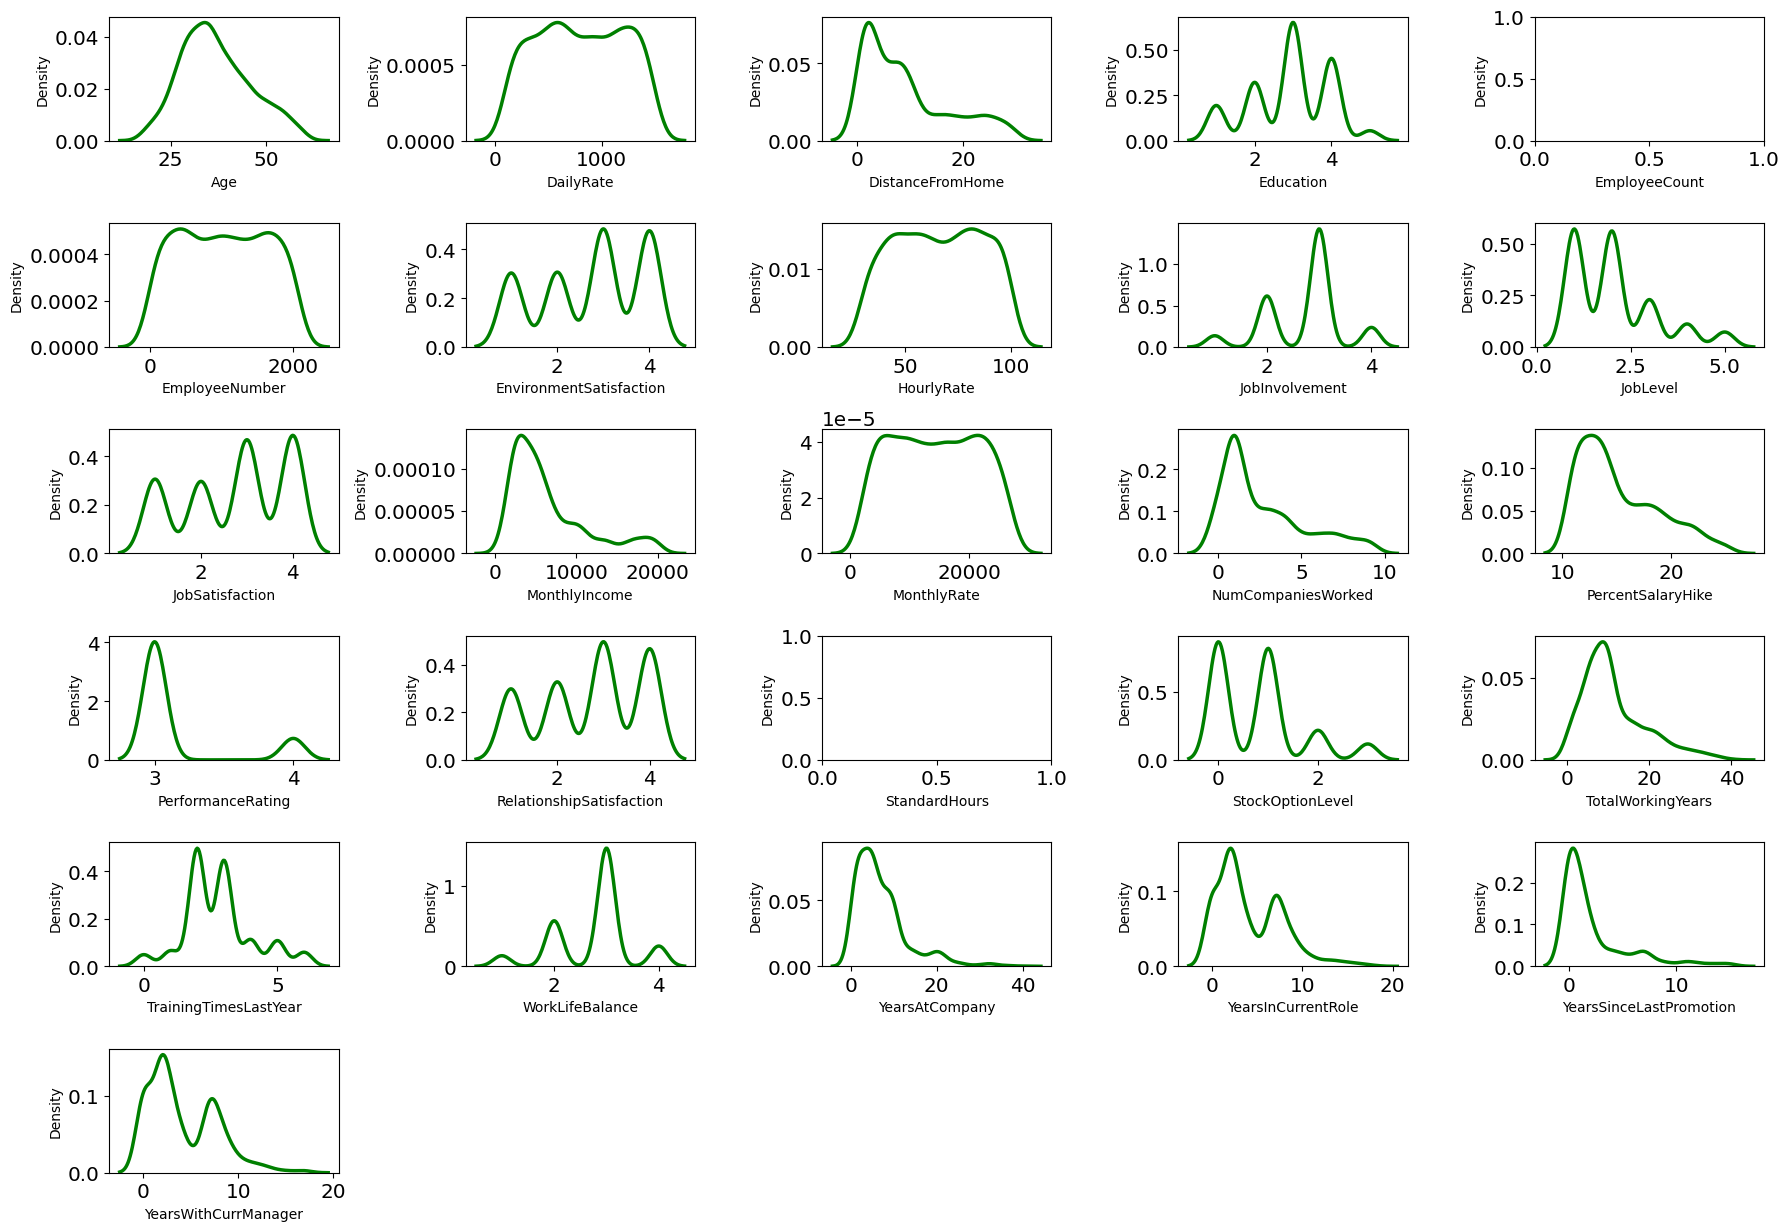

In [16]:
#displot
features = nums.columns
plt.figure(figsize=(18,14))
for i in range (0, len(features)):
    plt.subplot(math.ceil(len(features)/4), 5, i+1)
    sns.kdeplot(x=df[features[i]], color='g', warn_singular=False)
    plt.xlabel(features[i])
    plt.tight_layout()

### Bivariate

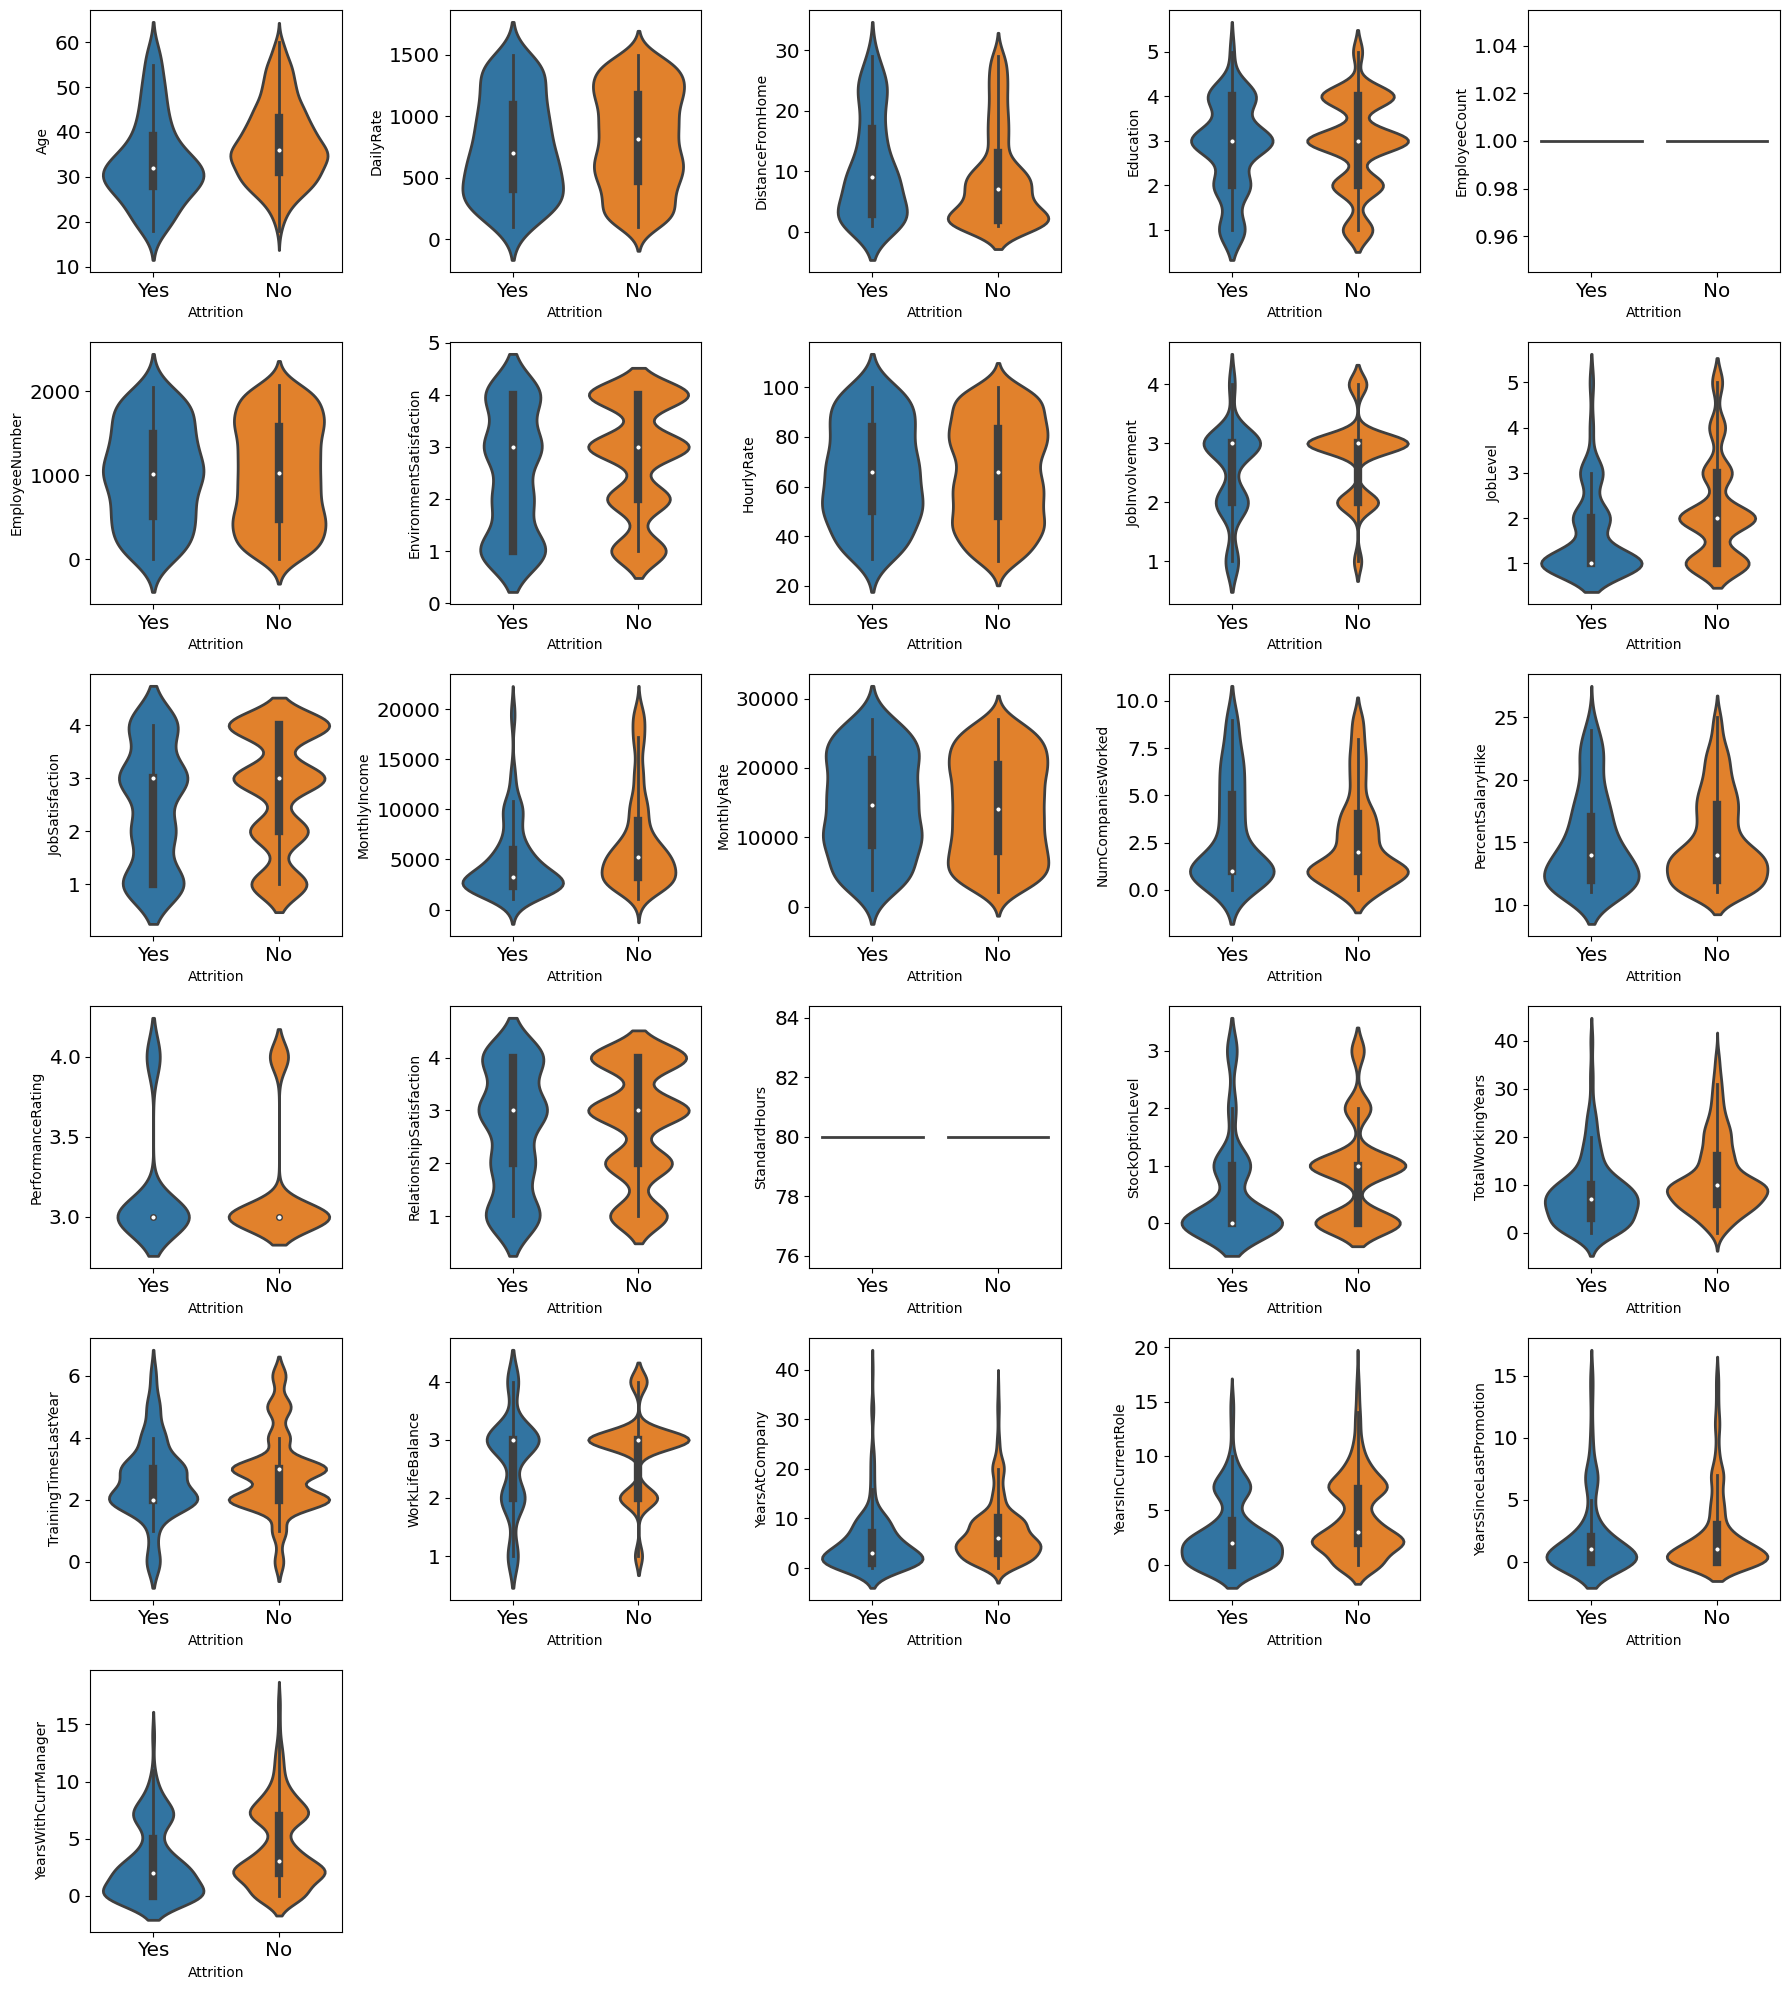

In [17]:
import math

plt.figure(figsize=(18, 20))
for i in range (0, len(features)):
    plt.subplot(math.ceil(len(features)/5), 5, i+1)
    sns.violinplot(data=df, y=features[i], x='Attrition', linewidth=2, orient='v')
    plt.tight_layout()

plt.show()
    

# Multivariate

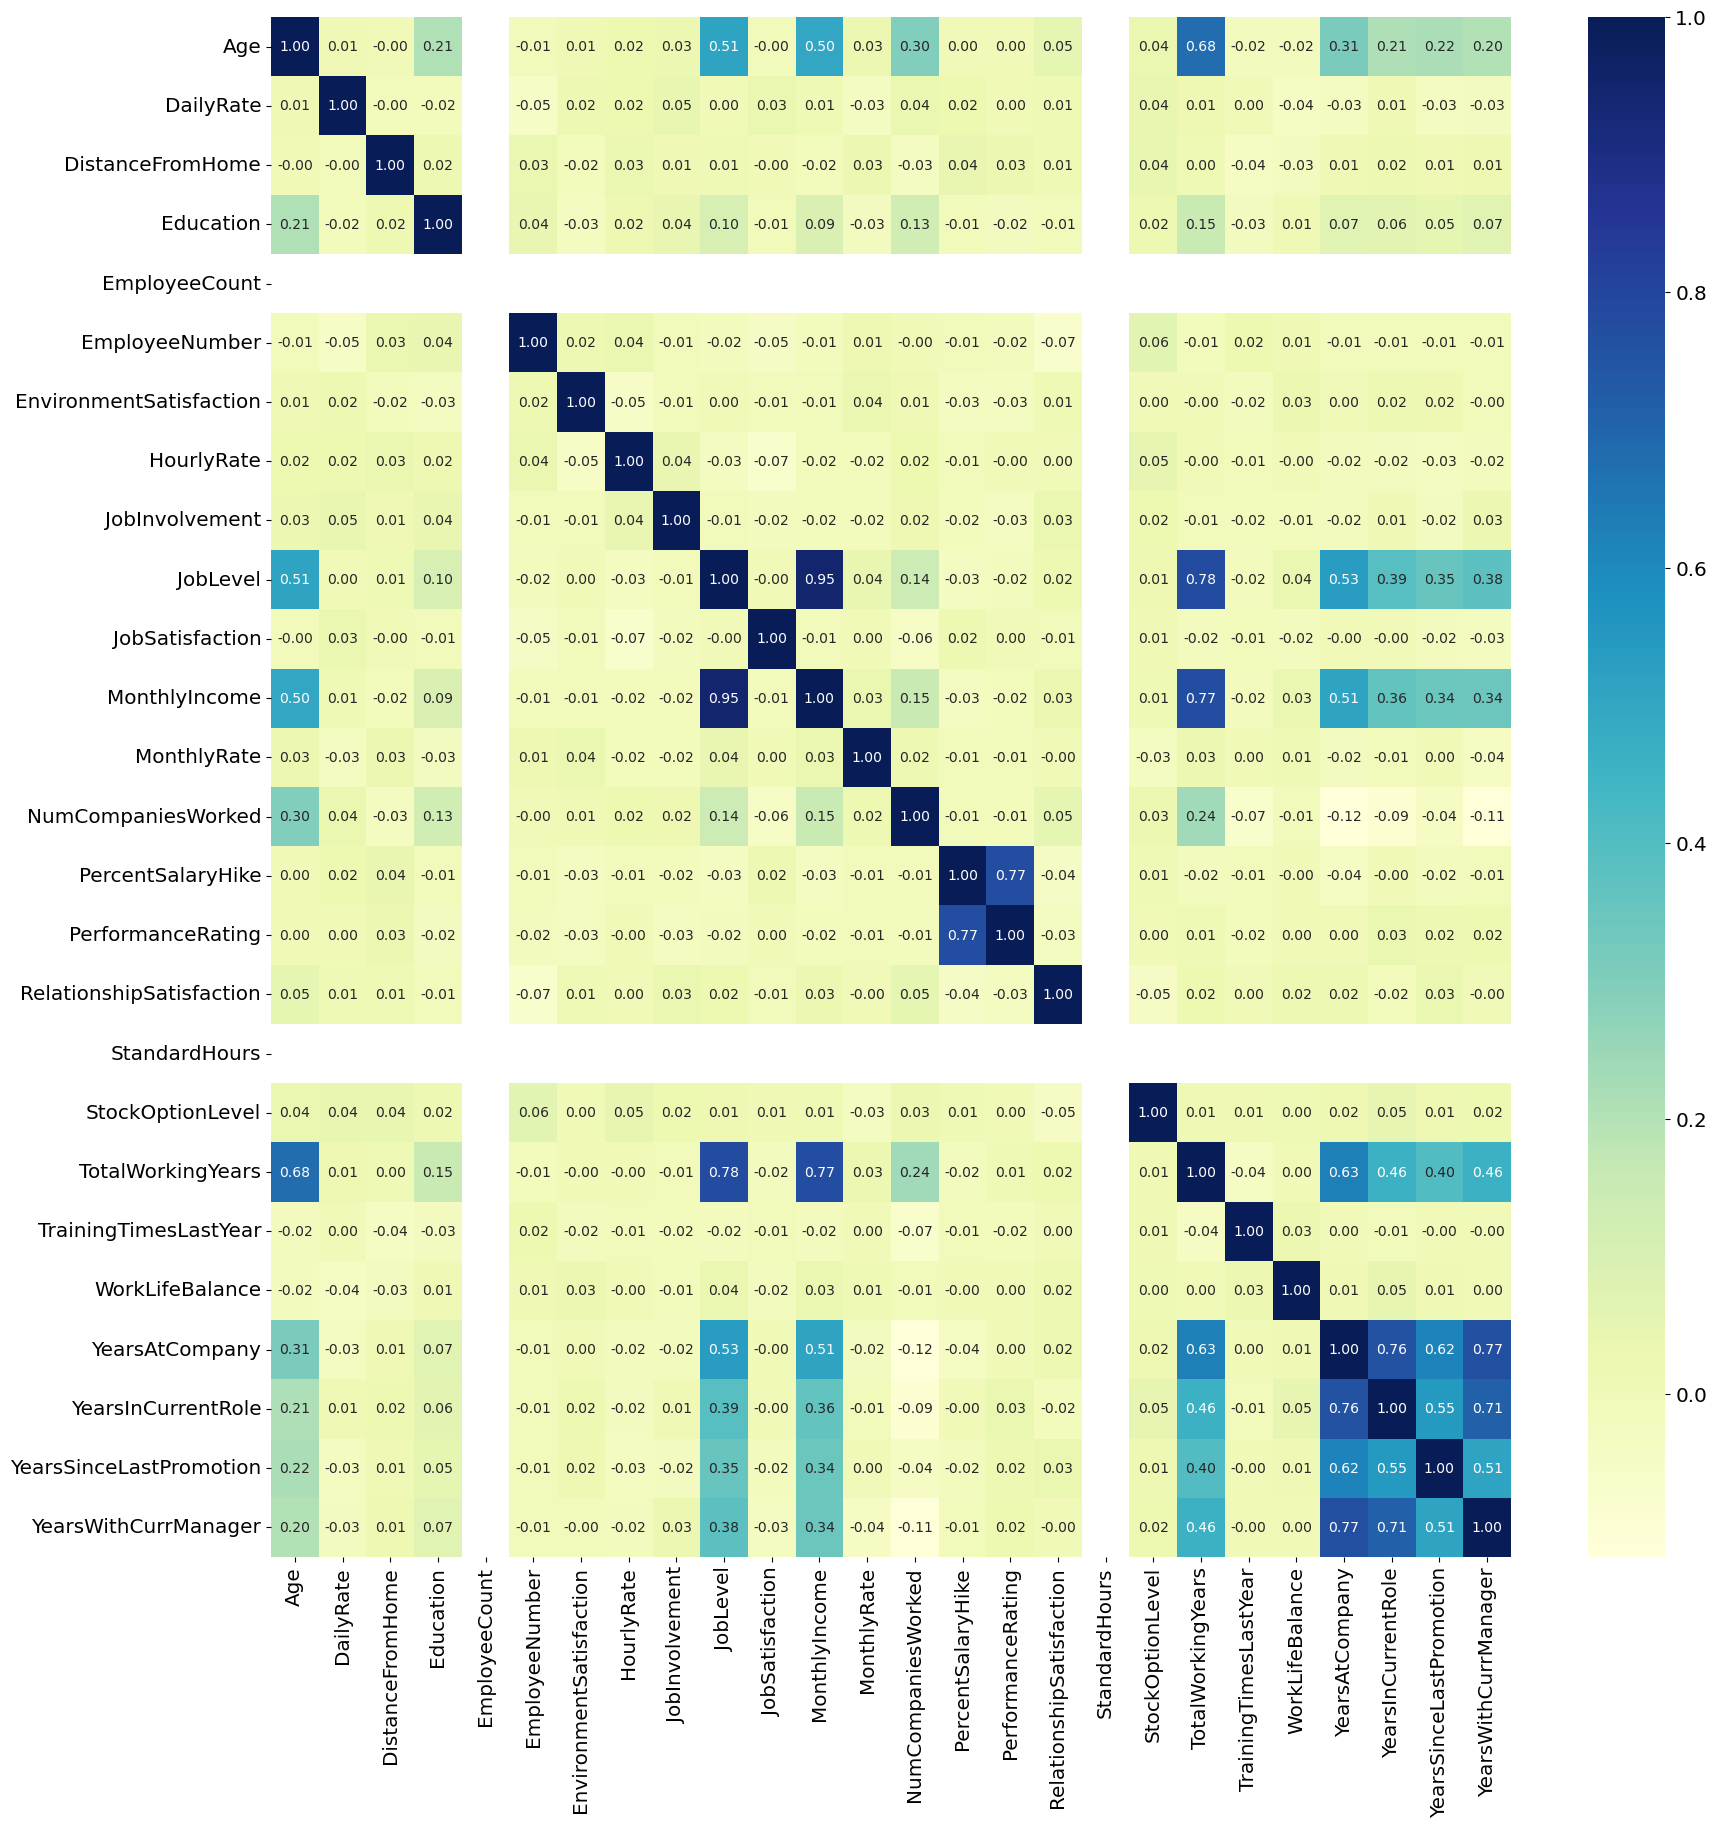

In [18]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

Observasi:

Berikut beberapa insight yang dapat kita tarik dari univariate dan multivariate analysis di atas.

#### Univariate:

- Terdapat beberapa kolom yang memiliki outlier (`MonthlyIncome` `NumCompaniesWorked` `PerformanceRating` `StockOptionLevel` `TotalWorkingYears` `WorkLifeBalance` `YearsAtCompany` `YearsInCurrentRole` `YearsSinceLastPromotion` `YearsWithCurrManager`) <br>
- Beberapa kolom mengalai positifly skewed
- Beberapa kolom numerik skew (dilihat dari perbedaan yang besar antara mean dan median) seperti `MonthlyIncome`
- Jika diperhatikan terdapat 2 kolom yang hanya memiliki 1 nilai sehingga kedepan bisa di drop yaitu `StandardHours` dan `Over18`


#### Multivariate:
- Terdapat multicollinearity antara kolom `JobLevel` dan `MonthlyIncome`, berarti kita bisa membuang salah satunya
- Korelasi antar beberpaa features memiliki nilai korelasi yang cukup tinggi namun tidak cukup tinggi hingga bisa dihapus salah satunya
- Ada 2 features yang tidak menampilkan nilai karena hanya memiliki 1 niali unik


# Preprocesing

## 1A. Handling Missing Value

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Obeservasi : 
- Tidak terdapat missing value pada semua features

## 1B. Handling duplicate data

In [20]:
df.duplicated().any()

False

#### Observsi :
- Tidak terdapat dtayang duplikat

## 1C. Handle Outlier

In [21]:
#hapus outlier dengan z-score
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 1470
Jumlah baris setelah memfilter outlier: 1387


#### Observasi :
- Setelah dilakuakn handling outlier, terdapat pengurangan data sebanyak 83 

## 1D. Features Transformation

In [22]:
#transformasi
for num in nums.columns:
    if num in ['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
        df[num] = np.log(df[num] + (df[df[num] > 0][num].min() / 2)) # kita harus pastikan data tidak 0 untuk dilogtransform

In [23]:
nums.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [24]:
#Standarisasi
from sklearn.preprocessing import StandardScaler

for col in nums.columns:
      if col in nums.columns:
        df[col] = StandardScaler().fit_transform(df[col].values.reshape(len(df), 1))

#### Observasi :
- Transformasi hanya dilakukan pada data yang mengalami skewed yaitu : `DistanceFromHome`,`MonthlyIncome`,`NumCompaniesWorked`,`PercentSalaryHike`,`TotalWorkingYears`,`YearsAtCompany`,`YearsInCurrentRole`,`YearsSinceLastPromotion`,`YearsWithCurrManager`


### Feature Selection

In [25]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    862
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1387
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1270
MonthlyRate                 1349
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             35
TrainingTimesLastYear          7
WorkLifeBa

#### Observasi :
- drop feature yang tidak terlalu berpengaruh terhdapa target yaitu ` performa rating`
- drop feature yang memiliki 1 nilai unik
- drop feature yang jumlah uniknya sebanyak row data

In [26]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','PerformanceRating'], axis=1)

## 1E. Feature Encoding

In [27]:
for col in cats:
    if col not in ['Over18']:
          print(f'value counts of column {col}')
          print(df[col].value_counts())
          print('---'*10, '\n')

value counts of column Attrition
No     1158
Yes     229
Name: Attrition, dtype: int64
------------------------------ 

value counts of column BusinessTravel
Travel_Rarely        981
Travel_Frequently    263
Non-Travel           143
Name: BusinessTravel, dtype: int64
------------------------------ 

value counts of column Department
Research & Development    909
Sales                     420
Human Resources            58
Name: Department, dtype: int64
------------------------------ 

value counts of column EducationField
Life Sciences       570
Medical             437
Marketing           149
Technical Degree    127
Other                79
Human Resources      25
Name: EducationField, dtype: int64
------------------------------ 

value counts of column Gender
Male      835
Female    552
Name: Gender, dtype: int64
------------------------------ 

value counts of column JobRole
Sales Executive              313
Research Scientist           291
Laboratory Technician        254
Manufacturing

#### Observasi :
- Label encoding : `Attrition`, `BusinessTravel`, `Gender`, `MaritalStatus`, `OverTime`
- One-hot ecnoding : `Department`, `EducationField`, `JobRole`

In [28]:
df['Attrition'] = df['OverTime'].map({'No':0,'Yes':1})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Married':1,'Divorced':2})
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})

In [29]:
for cat in ['Department','EducationField','JobRole']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)
    df.drop(columns=[cat], inplace=True)

In [30]:
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.536681,1,1,0.734325,-1.558672,-0.876177,-0.665328,0,1.388670,0.376231,0.043309,1.143776,0,0.294856,0.734688,1.539804,1,-1.272218,-1.575817,-0.929427,-0.022666,-2.171420,-2.501172,0.323858,0.413438,-1.023549,0.638267,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.442111,0,2,-1.307769,0.283433,-1.853858,0.251978,1,-0.239091,-1.034126,0.043309,-0.673426,1,0.045304,1.505353,-0.496297,0,1.992721,1.199034,0.238250,0.262992,0.151871,0.336558,0.909734,0.933440,0.091200,0.947294,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.083966,1,1,1.406752,-1.016187,-0.876177,1.169285,1,1.290017,-1.034126,-0.941432,0.235175,0,-1.312723,-1.690747,1.224912,1,0.024480,-0.650866,-0.929427,-0.191868,0.151871,0.336558,-2.809644,-1.823258,-1.023549,-1.750911,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,-0.368749,1,2,1.453896,-0.658862,1.079185,1.169285,0,-0.485721,0.376231,-0.941432,0.235175,1,-0.832311,1.257173,-0.496297,1,-1.272218,0.274084,-0.929427,-0.022666,0.151871,0.336558,0.651586,0.933440,0.950943,-1.750911,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.047821,0,1,-0.533609,-1.016187,-1.853858,-1.582635,1,-1.274939,0.376231,-0.941432,-0.673426,1,-0.566739,0.330473,1.670363,0,-0.920717,1.199034,0.238250,-0.385319,0.151871,0.336558,-0.843455,-0.184908,0.609529,-0.147324,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.029213,0,2,0.193406,1.363393,-0.876177,0.251978,1,-1.225613,1.786588,0.043309,1.143776,1,-1.014902,-0.286002,0.793271,0,0.580583,0.274084,0.238250,0.953552,0.151871,0.336558,0.119774,-0.184908,-1.023549,0.187925,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1466,0.310324,0,1,-0.479021,-0.001457,-1.853858,1.169285,1,-1.176286,-1.034126,1.028050,-1.582027,1,1.134574,1.015523,0.793271,0,0.024480,-1.575817,0.238250,0.127694,1.700732,0.336558,0.498679,0.933440,0.091200,0.947294,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1467,-1.047821,1,1,-1.615447,-0.391972,0.101504,-0.665328,1,1.043387,1.786588,0.043309,-0.673426,1,0.334559,-1.296328,-0.496297,1,1.328282,-0.650866,0.238250,-0.385319,-2.171420,0.336558,0.323858,-0.184908,-1.023549,0.187925,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1468,1.442111,0,2,0.538304,-1.016187,0.101504,1.169285,1,-0.140439,-1.034126,0.043309,-0.673426,1,0.124300,-0.150696,0.103318,0,-0.274272,1.199034,-0.929427,0.953552,0.151871,-1.082307,0.787466,0.787769,-1.023549,1.072002,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


# 1F. Imbalance Class

In [34]:
value_counts = df['Attrition'].value_counts(normalize=True)
value_counts

0    0.715213
1    0.284787
Name: Attrition, dtype: float64

In [37]:
class_0_count = value_counts[0]
class_1_count = value_counts[1]
class_ratio = class_1_count / class_0_count
class_ratio

0.39818548387096775

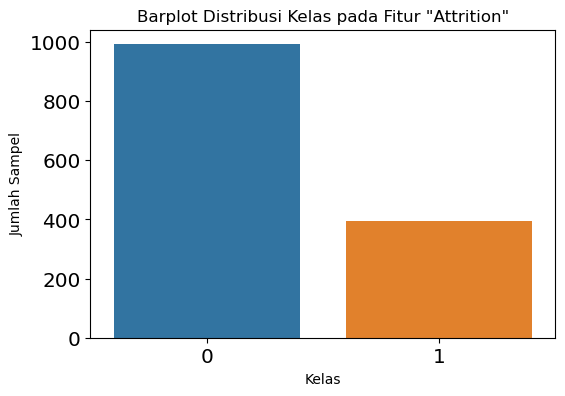

In [38]:
# Hitung frekuensi masing-masing nilai dalam kolom 'exclusive'
value_counts = df['Attrition'].value_counts()

# Buat barplot menggunakan Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Barplot Distribusi Kelas pada Fitur "Attrition"')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

In [41]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [42]:
from imblearn.over_sampling import RandomOverSampler

# Applying RandomOverSampler to address class imbalance
ros = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = ros.fit_resample(X, y)


In [43]:
X_over.shape

(1488, 44)

In [44]:
y_over.shape

(1488,)

In [45]:
print('Original')
print(pd.Series(y).value_counts())

print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())


Original
0    992
1    395
Name: Attrition, dtype: int64
OVERSAMPLING
0    992
1    496
Name: Attrition, dtype: int64
